In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def create_flexible_box_plot(metric, *file_paths):
    """
    Create a merged box plot for a specified metric from multiple datasets.

    Parameters:
        metric (str): The metric to be plotted.
        *file_paths (tuples): Variable-length argument where each tuple contains two elements:
                              (stats_file_path, data_file_path) for one dataset.
    """
    data_combined = []
    stats_labels = []

    # Loop through the file paths
    for idx, (stats_file_path, data_file_path) in enumerate(file_paths, start=1):
        # Extract label from data file path (e.g., "60-/pd" from "../computing/dataset/ppmi/60-/pd/metrics/graph_metrics.csv")
        label = os.path.normpath(data_file_path).split(os.sep)[-4:-2]  # Extract relevant parts of the path
        label = "/".join(label)  # Join parts to form the label
        # Load the CSV files
        stats_df = pd.read_csv(stats_file_path)
        data_df = pd.read_csv(data_file_path)

        # Extract the data for the metric
        data = data_df[metric]
        data_combined.append(data)

        # Extract the mean and median for the metric
        mean = stats_df.loc[stats_df['Metric'].str.lower() == metric.lower(), 'Mean'].values[0]
        median = stats_df.loc[stats_df['Metric'].str.lower() == metric.lower(), 'Median'].values[0]

        # Add label for the dataset
        stats_labels.append(f'{label}\nMean: {mean:.2f}\nMedian: {median:.2f}')

    # Create the box plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.boxplot(data_combined, vert=True, patch_artist=True)

    # Set limits and scaling
    all_data = [item for sublist in data_combined for item in sublist]  # Flatten combined data for scaling
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_ylim([min(all_data) / 1.5, max(all_data) * 1.5])  # Adjust limits for better visibility

    ax.set_title(f'Merged Distribution of {metric}', fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

    # Add custom labels for datasets
    ax.set_xticklabels(stats_labels, ha='right', fontsize=12)

    plt.tight_layout()
    plt.show()


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

# Utility to save all charts into a PDF
def save_charts_to_pdf(pdf_filename="charts_output.pdf"):
    """
    Save all generated matplotlib figures into a PDF.

    Args:
        pdf_filename (str): The name of the output PDF file.
    """
    import matplotlib.pyplot as plt

    # Get all current figure objects
    figures = [plt.figure(i) for i in plt.get_fignums()]

    if not figures:
        print("No figures to save.")
        return

    # Save figures to PDF
    with PdfPages(pdf_filename) as pdf:
        for fig in figures:
            pdf.savefig(fig)  # Save each figure to the PDF

    print(f"Charts saved to {pdf_filename}")

In [ ]:
# Example usage
stats_file_path_1 = "../computing/dataset/ppmi/60-/pd/stats/graph_statistics.csv"
stats_file_path_2 = "../computing/dataset/ppmi/60_70/pd/stats/graph_statistics.csv"
stats_file_path_3 = "../computing/dataset/ppmi/70+/pd/stats/graph_statistics.csv"
data_file_path_1 = "../computing/dataset/ppmi/60-/pd/metrics/graph_metrics.csv"
data_file_path_2 = "../computing/dataset/ppmi/60_70/pd/metrics/graph_metrics.csv"
data_file_path_3 = "../computing/dataset/ppmi/70+/pd/metrics/graph_metrics.csv"
stats_file_path_4 = "../computing/dataset/ppmi/60-/control/stats/graph_statistics.csv"
stats_file_path_5 = "../computing/dataset/ppmi/60_70/control/stats/graph_statistics.csv"
stats_file_path_6 = "../computing/dataset/ppmi/70+/control/stats/graph_statistics.csv"
data_file_path_4 = "../computing/dataset/ppmi/60-/control/metrics/graph_metrics.csv"
data_file_path_5 = "../computing/dataset/ppmi/60_70/control/metrics/graph_metrics.csv"
data_file_path_6 = "../computing/dataset/ppmi/70+/control/metrics/graph_metrics.csv"
# Call the function with multiple (stats_file, data_file) pairs
create_flexible_box_plot(
    "Closeness",
    (stats_file_path_1, data_file_path_1),
    (stats_file_path_2, data_file_path_2),
    (stats_file_path_3, data_file_path_3),
    (stats_file_path_4, data_file_path_4),
    (stats_file_path_5, data_file_path_5),
    (stats_file_path_6, data_file_path_6)
)
create_flexible_box_plot(
    "Clustering",
    (stats_file_path_1, data_file_path_1),
    (stats_file_path_2, data_file_path_2),
    (stats_file_path_3, data_file_path_3),
    (stats_file_path_4, data_file_path_4),
    (stats_file_path_5, data_file_path_5),
    (stats_file_path_6, data_file_path_6)
)
create_flexible_box_plot(
    "Degree",
    (stats_file_path_1, data_file_path_1),
    (stats_file_path_2, data_file_path_2),
    (stats_file_path_3, data_file_path_3),
    (stats_file_path_4, data_file_path_4),
    (stats_file_path_5, data_file_path_5),
    (stats_file_path_6, data_file_path_6)
)

save_charts_to_pdf("pd.pdf")


In [ ]:
import matplotlib.pyplot as plt

def create_flexible_box_plot(metric, *file_paths, show_plot=False):
    """
    Create a merged box plot for a specified metric from multiple datasets.

    Parameters:
        metric (str): The metric to be plotted.
        *file_paths (tuples): Variable-length argument where each tuple contains two elements:
                              (stats_file_path, data_file_path) for one dataset.
        show_plot (bool): Whether to display the plot immediately.
    """
    import os
    import pandas as pd

    data_combined = []
    stats_labels = []

    for stats_file_path, data_file_path in file_paths:
        # Generate label from file path
        label = os.path.normpath(data_file_path).split(os.sep)[-4:-2]
        label = "/".join(label)

        stats_df = pd.read_csv(stats_file_path)
        data_df = pd.read_csv(data_file_path)

        data = data_df[metric]
        data_combined.append(data)

        mean = stats_df.loc[stats_df['Metric'].str.lower() == metric.lower(), 'Mean'].values[0]
        median = stats_df.loc[stats_df['Metric'].str.lower() == metric.lower(), 'Median'].values[0]

        stats_labels.append(f'{label}\nMean: {mean:.2f}\nMedian: {median:.2f}')

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.boxplot(data_combined, vert=True, patch_artist=True)

    all_data = [item for sublist in data_combined for item in sublist]
    ax.set_yscale('log')
    ax.set_ylim([min(all_data) / 1.5, max(all_data) * 1.5])

    ax.set_title(f'Merged Distribution of {metric}', fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xticklabels(stats_labels, rotation=45, ha='right', fontsize=12)

    plt.tight_layout()

    if show_plot:
        plt.show()


In [ ]:
# Generate plots
create_flexible_box_plot(
    "Closeness",
    (stats_file_path_1, data_file_path_1),
    (stats_file_path_2, data_file_path_2),
    (stats_file_path_3, data_file_path_3),
    (stats_file_path_4, data_file_path_4),
    (stats_file_path_5, data_file_path_5),
    (stats_file_path_6, data_file_path_6)
)

create_flexible_box_plot(
    "Clustering",
    (stats_file_path_1, data_file_path_1),
    (stats_file_path_2, data_file_path_2),
    (stats_file_path_3, data_file_path_3),
    (stats_file_path_4, data_file_path_4),
    (stats_file_path_5, data_file_path_5),
    (stats_file_path_6, data_file_path_6)
)

create_flexible_box_plot(
    "Degree",
    (stats_file_path_1, data_file_path_1),
    (stats_file_path_2, data_file_path_2),
    (stats_file_path_3, data_file_path_3),
    (stats_file_path_4, data_file_path_4),
    (stats_file_path_5, data_file_path_5),
    (stats_file_path_6, data_file_path_6)
)

# Save to PDF
save_charts_to_pdf("pd.pdf")


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def create_grouped_box_plot(metric, groups, show_plot=False):
    """
    Create a grouped box plot for a specified metric from multiple datasets.

    Parameters:
        metric (str): The metric to be plotted.
        groups (list): List of group names, one for each subset of file paths.
        *file_paths (tuples): Variable-length argument where each tuple contains:
                              (stats_file_path, data_file_path) for one dataset.
                              The file paths should be grouped to match the groups list.
    """
    data_combined = []
    stats_labels = []
    group_colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))  # Generate distinct colors
    group_positions = []  # Store positions of group divisions
    group_names = []  # To generate legend dynamically
    group_counter = 0

    for group_idx, group_files in enumerate(groups):
        # Extract group name from file path (e.g., "pd" or "control")
        group_name = os.path.normpath(group_files[0][1]).split(os.sep)[-3]
        group_names.append(group_name.capitalize())  # Capitalize for better formatting

        for stats_file_path, data_file_path in group_files:
            # Extract the dataset version (e.g., "60-", "60_70", "70+")
            dataset_version = os.path.normpath(data_file_path).split(os.sep)[-4]  # Get the second-to-last folder
            label = dataset_version  # Use dataset version directly as the label

            stats_df = pd.read_csv(stats_file_path)
            data_df = pd.read_csv(data_file_path)

            data = data_df[metric]
            data_combined.append(data)

            mean = stats_df.loc[stats_df['Metric'].str.lower() == metric.lower(), 'Mean'].values[0]
            median = stats_df.loc[stats_df['Metric'].str.lower() == metric.lower(), 'Median'].values[0]

            stats_labels.append(f'{label}\nMean: {mean:.2f}\nMedian: {median:.2f}')

        # Store group position
        group_counter += len(group_files)
        group_positions.append(group_counter)

    # Create the box plot
    fig, ax = plt.subplots(figsize=(12, 8))
    box = ax.boxplot(data_combined, vert=True, patch_artist=True)

    # Apply colors based on groups
    for i, patch in enumerate(box['boxes']):
        group_idx = next(idx for idx, pos in enumerate(group_positions) if i < pos)
        patch.set_facecolor(group_colors[group_idx])

    # Add vertical lines to separate groups
    for pos in group_positions[:-1]:
        ax.axvline(pos + 0.5, color='gray', linestyle='--', linewidth=1)

    # Set limits and scaling
    all_data = [item for sublist in data_combined for item in sublist]
    ax.set_yscale('log')
    ax.set_ylim([min(all_data) / 1.5, max(all_data) * 1.5])

    ax.set_title(f'Merged Distribution of {metric}', fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xticks(range(1, len(stats_labels) + 1))
    ax.set_xticklabels(stats_labels, rotation=45, ha='right', fontsize=12)

    # Add legend for group colors
    for idx, group_name in enumerate(group_names):
        ax.plot([], [], color=group_colors[idx], label=f'Group {idx + 1}: {group_name}')
    ax.legend(fontsize=10, loc='upper right')

    plt.tight_layout()
    if show_plot:
        plt.show()



In [20]:
# Save all charts to a PDF
def save_charts_to_pdf(pdf_filename="charts_output.pdf"):
    """
    Save all generated matplotlib figures into a PDF.

    Args:
        pdf_filename (str): The name of the output PDF file.
    """
    # Get all current figure objects
    figures = [plt.figure(i) for i in plt.get_fignums()]

    if not figures:
        print("No figures to save.")
        return

    # Save figures to PDF
    with PdfPages(pdf_filename) as pdf:
        for fig in figures:
            pdf.savefig(fig)  # Save each figure to the PDF

    print(f"Charts saved to {pdf_filename}")

Generated plot for metric: Closeness
Generated plot for metric: Clustering
Generated plot for metric: Degree
Charts saved to pd.pdf


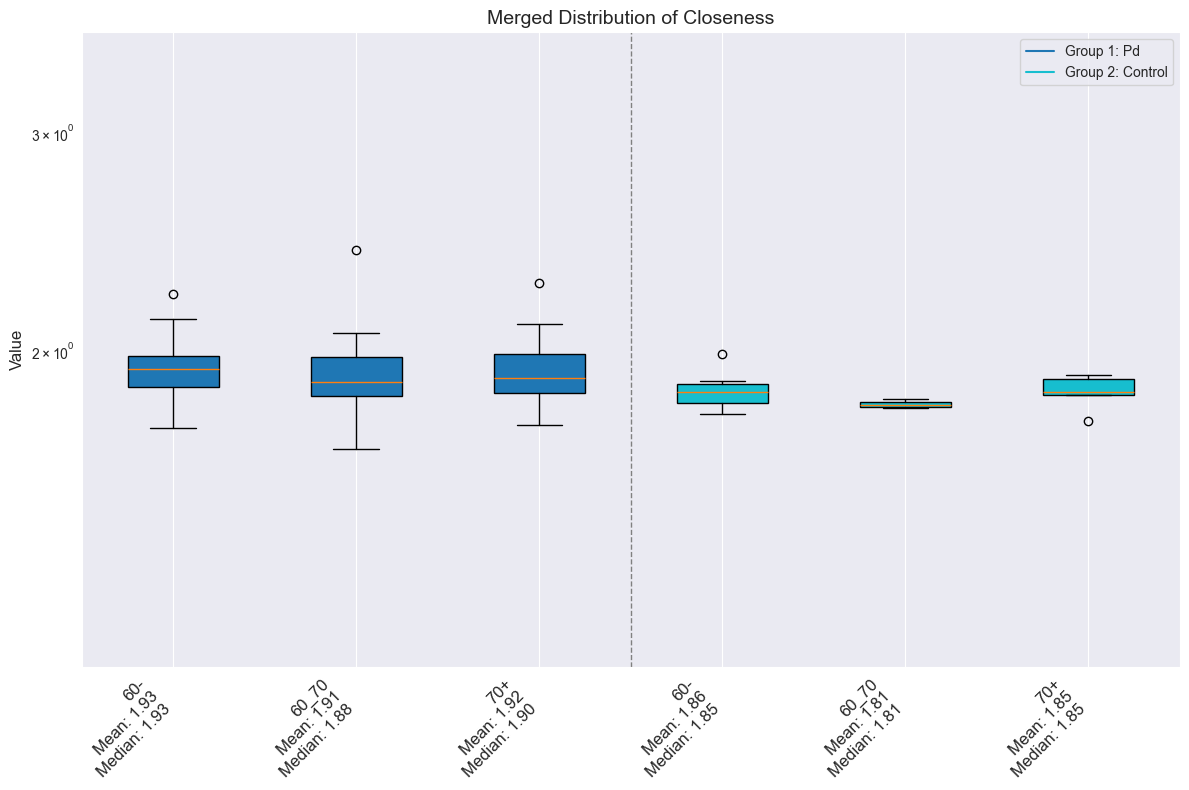

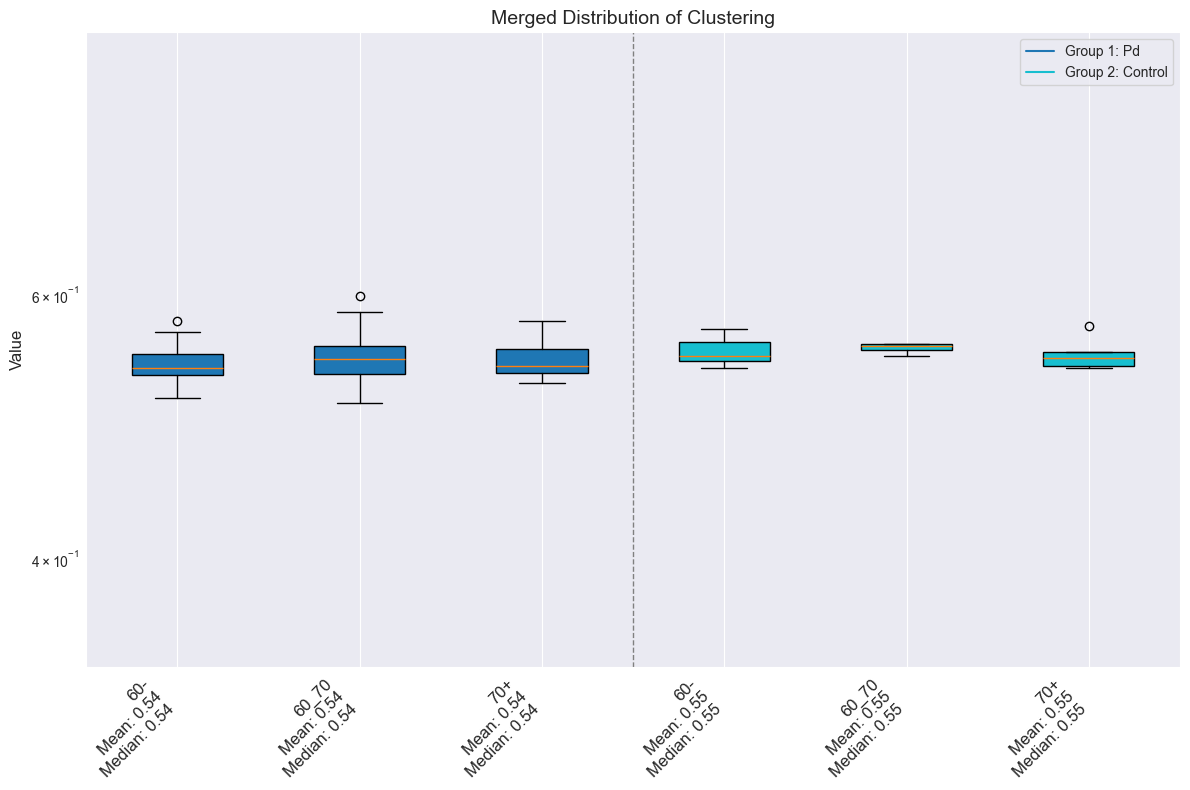

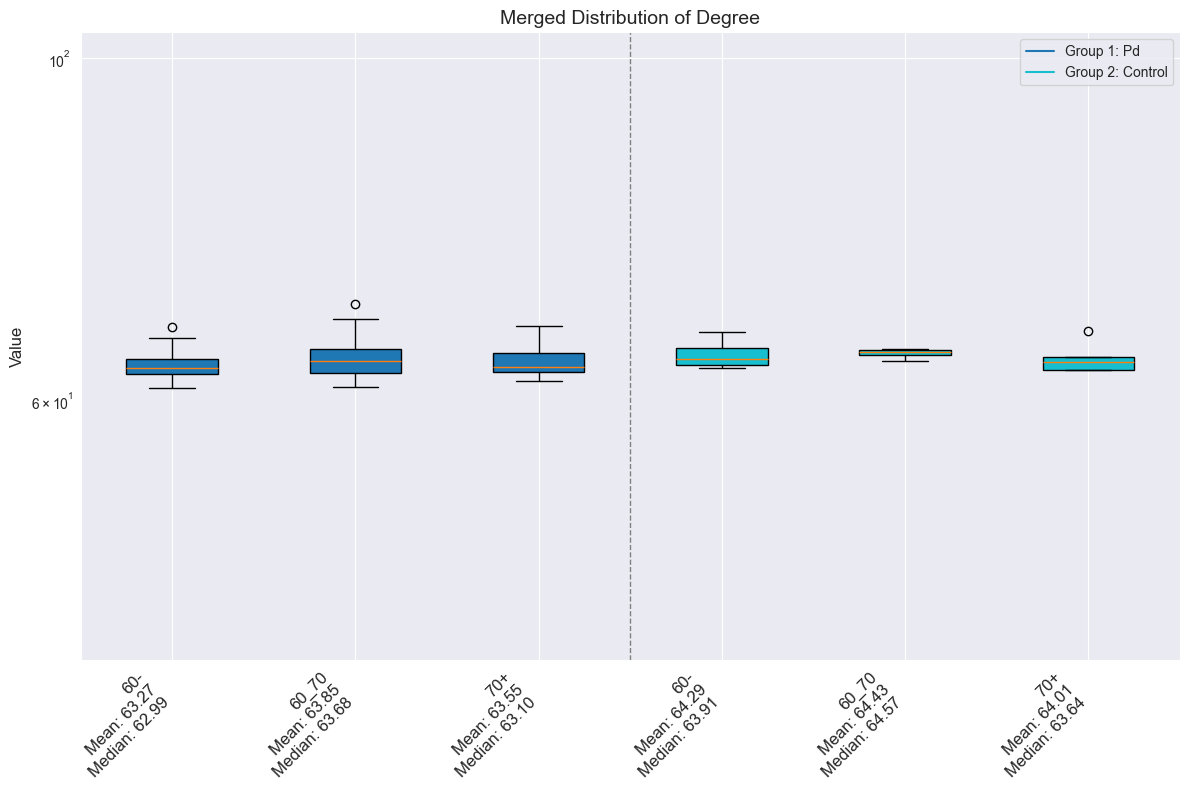

In [21]:
# Define a function to generate plots for multiple metrics
def generate_grouped_box_plots(metrics, groups):
    """
    Generate grouped box plots for a list of metrics.

    Parameters:
        metrics (list): List of metric names to generate plots for.
        groups (list): List of groups with their associated file paths.
    """
    for metric in metrics:
        create_grouped_box_plot(metric, groups)
        print(f"Generated plot for metric: {metric}")

# Define metrics to generate plots for
metrics_to_plot = ["Closeness", "Clustering", "Degree"]

# Define groups and their associated file paths
group_1 = [
    ("../computing/dataset/ppmi/60-/pd/stats/graph_statistics.csv", "../computing/dataset/ppmi/60-/pd/metrics/graph_metrics.csv"),
    ("../computing/dataset/ppmi/60_70/pd/stats/graph_statistics.csv", "../computing/dataset/ppmi/60_70/pd/metrics/graph_metrics.csv"),
    ("../computing/dataset/ppmi/70+/pd/stats/graph_statistics.csv", "../computing/dataset/ppmi/70+/pd/metrics/graph_metrics.csv"),
]

group_2 = [
    ("../computing/dataset/ppmi/60-/control/stats/graph_statistics.csv", "../computing/dataset/ppmi/60-/control/metrics/graph_metrics.csv"),
    ("../computing/dataset/ppmi/60_70/control/stats/graph_statistics.csv", "../computing/dataset/ppmi/60_70/control/metrics/graph_metrics.csv"),
    ("../computing/dataset/ppmi/70+/control/stats/graph_statistics.csv", "../computing/dataset/ppmi/70+/control/metrics/graph_metrics.csv"),
]

# Generate plots for all metrics
generate_grouped_box_plots(metrics_to_plot, [group_1, group_2])
save_charts_to_pdf("pd.pdf")

